<h4> Regresja liniowa

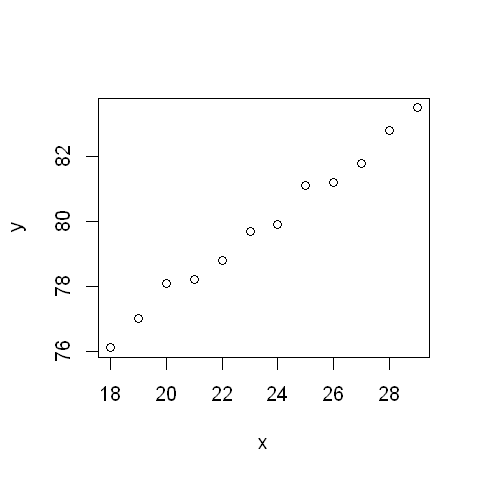

In [3]:
x = c(18,19,20,21,22,23,24,25,26,27,28,29)
y = c(76.1,77,78.1,78.2,78.8,79.7,79.9,81.1,81.2,81.8,82.8,83.5)

options(repr.plot.width=4, repr.plot.height=4)
plot(x,y)

In [4]:
cor(x,y) #spolczynnik korealcji Pearsona

[1] 0.9943661

In [5]:
lm.r = lm(y ~ x) #budujemy model regresji liniowej y=ax+b
print(summary(lm.r))


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27238 -0.24248 -0.02762  0.16014  0.47238 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  64.9283     0.5084  127.71  < 2e-16 ***
x             0.6350     0.0214   29.66 4.43e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.256 on 10 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9876 
F-statistic:   880 on 1 and 10 DF,  p-value: 4.428e-11



In [6]:
print(coef(lm.r)) #same wspolczynniki

(Intercept)           x 
  64.928322    0.634965 


In [7]:
confint(lm.r, level = 0.95) #przedzial ufnosci dla parametrow modelu

,2.5 %,97.5 %
(Intercept),63.7955131,66.0611303
x,0.5872722,0.6826578


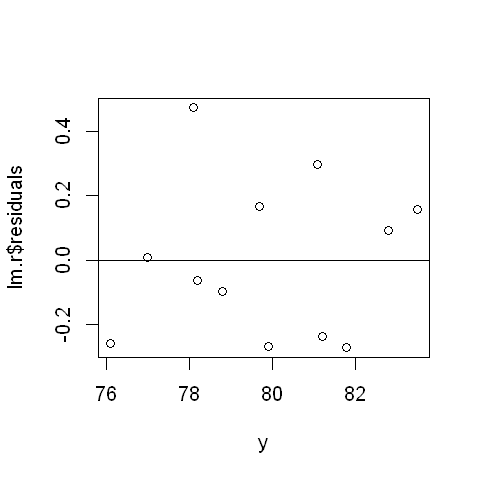

In [8]:
plot(y, lm.r$residuals)
abline(h = 0) #dodaje y=0; punkty powinny byc rozrzucone symetrycznie wzgledem tej prostej

Diagnostyka modelu:

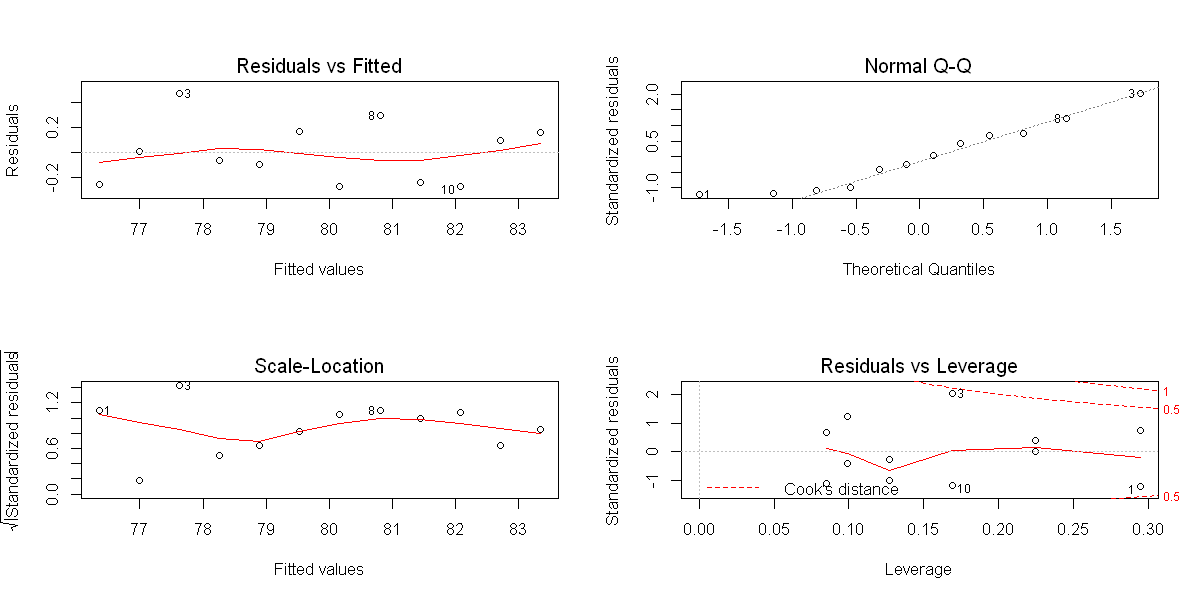

In [9]:
options(repr.plot.width=10, repr.plot.height=5)

par(mfrow = c(2, 2));
plot(lm.r)

Opis:

- residuals vs fitted: na osi OX oszacowane y_pred; na osi OY: y - y_pred; powinno być w okolicach 0 (w miare symetrycznie)

- normal QQ: na osi OY kwantyle empiryczne dla standaryzowanych reszt

- scale location: na osi OX oszacowane y_pred; na osi OY: pierwiastki z modułów standarzyowanych reszt (powinny być równie rozłożone wokół czerwonej linii; ta nie powinna wykazywac zadnej tendencji --> stała wariancja)

- residuals vs laverage: do wykrywania obserwacji nietypowych; na osi OY stanaryzowane reszty; na osi OX dźwignie $h_i$ (miara wpływu obserwacji na ocene współczynników). Interesują nas te przypadki, które wpadają poza czerwone wykreskowane linie. Im większa wartość, tym bardziej dana obserwacja wpływa na wartości współczynnika regresji.

In [10]:
#przewidywanie nowych wartosci
predict(lm.r, data.frame(x = 28.5), level = 0.95, interval = "confidence")

fit,lwr,upr
83.02483,82.73505,83.3146


<h4> Zadanie1: Przeanalizuj dane $mass.txt$ zawierające informacje dotyczące masy ciała (trzecia kolumna) oraz masy mózgu (druga kolumna) dla pewnych ssaków.
    
- narysuj wykres zależności trzeciej kolumny od drugiej, zbuduj model regresji liniowej (szukamy zależności masy ciała w oparciu o masę mózgu)
  
- przekształć wartości drugiej i trzeciej kolumny przez logarytm a następnie wykonaj regresję liniową (szukamy zależności masy ciała w oparciu o masę mózgu),
  
- skomentuj otrzymane modele a następnie dokonaj ich diagnostyki,
    
- jaka by była masa ciała ssaka, którego masa mózgu wynosi 62 (wg obu modeli)?

<h4> Zadanie2: Rozważ dane dotyczące wczasowiczów spędzających czas nad morzem w miejscowości $X$. Pierwsza kolumna określa dzienną liczbę incydentów (takie jak wypadki/utonięcia), druga zawiera informacje o liczbie sprzedanych lodów w ciągu kolejnych dni. Zbuduj odpowiedni model liniowy a następnie skomentuj otrzymane wyniki. Czy dostrzegasz pewne niebezpieczeństwo?

In [9]:
x = c(56, 87, 92, 45, 87, 12, 102, 88, 17, 10) #liczba incydentow
y = c(267, 406, 485, 279, 417, 109, 538, 410, 58, 31) #liczba sprzedanych lodow
    
data.frame(x=x, y=y)

x,y
56,267
87,406
92,485
45,279
87,417
12,109
102,538
88,410
17,58
10,31


<h4> Regresja liniowa bez wyrazu wolnego

In [10]:
summary(lm(y ~ 0 + x )) #inna formula to x -1  (y = ax)


Call:
lm(formula = y ~ 0 + x)

Residuals:
   Min     1Q Median     3Q    Max 
-30.13 -25.02 -15.60  27.11  53.94 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   5.0014     0.1534    32.6 1.18e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 33.42 on 9 degrees of freedom
Multiple R-squared:  0.9916,	Adjusted R-squared:  0.9907 
F-statistic:  1063 on 1 and 9 DF,  p-value: 1.183e-10


<h3> Uzupełnienie

<h4> Kwartet Anscombea

In [11]:
library(datasets)
datasets::anscombe

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56
7,7,7,8,4.82,7.26,6.42,7.91


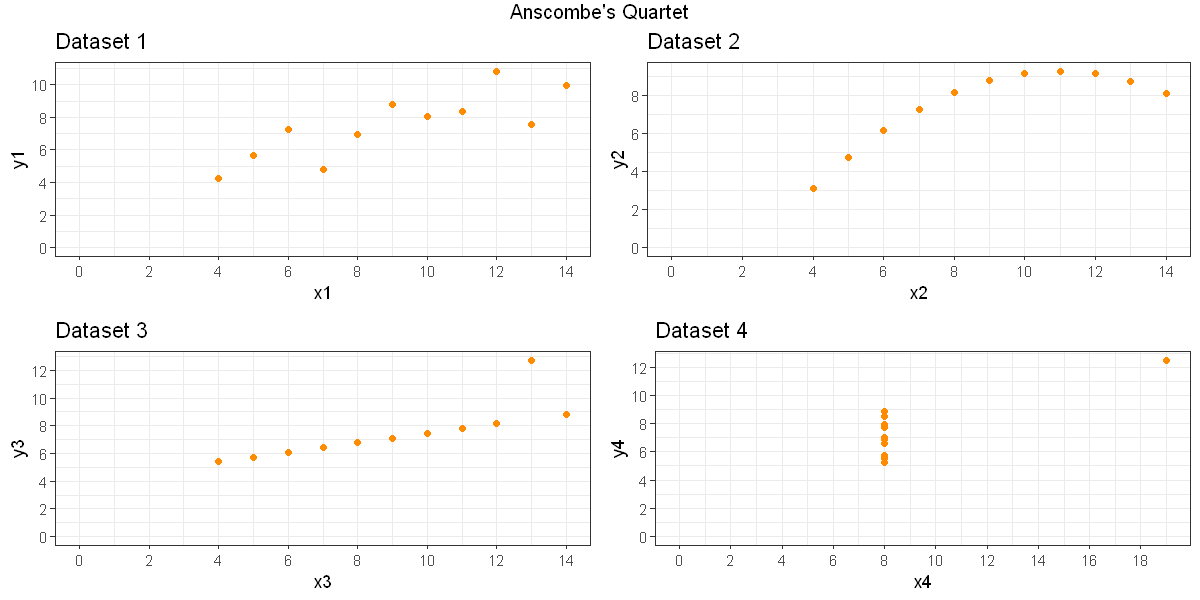

In [18]:
#jak wygladają te dane? y1 od x1, y2 od x2 itd

In [13]:
sapply(1:8, function(x) mean(anscombe[ , x])) #srednia

[1] 9.000000 9.000000 9.000000 9.000000 7.500909 7.500909 7.500000 7.500909

In [14]:
sapply(1:8, function(x) var(anscombe[ , x])) #wariancja

[1] 11.000000 11.000000 11.000000 11.000000  4.127269  4.127629  4.122620
[8]  4.123249

In [15]:
sapply(1:4, function(x) cor(anscombe[ , x], anscombe[ , x+4])) #wsp korelacji

[1] 0.8164205 0.8162365 0.8162867 0.8165214

In [16]:
lapply(1:4, function(x) summary(lm(anscombe[ , x+4]~anscombe[ , x]))) #wsp korelacji

[[1]]

Call:
lm(formula = anscombe[, x + 4] ~ anscombe[, x])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     3.0001     1.1247   2.667  0.02573 * 
anscombe[, x]   0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217


[[2]]

Call:
lm(formula = anscombe[, x + 4] ~ anscombe[, x])

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)      3.001      1.125   2.667  0.02576 * 
anscombe[, x]    0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error

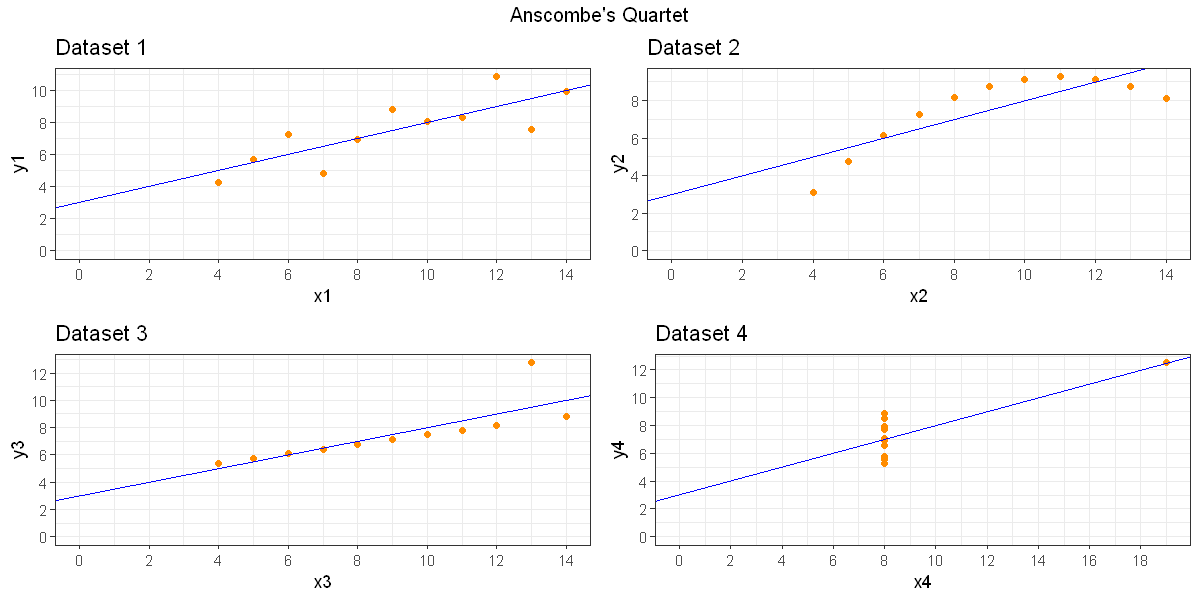

In [17]:
#nalozone regresje liniowe